In [16]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders

# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william'

# UBUNTU
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_6_24hz'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/testes_emlsr'
# folder_path = r'/home/william/ns-3/ns-allinone-3.43/ns-3.43/testes_emlsr'
# folder_path = r'/home/william/downloads/results_teste3'
folder_path = r'/home/william/downloads/flow_testes'

# home\william\downloads\results_teste

banda_filter = 40
gi_filter = 800

files, folders = list_file_n_foldes(folder_path)

# print(files)
# print(folders)

columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs', 'STD']
all_data = pd.DataFrame(columns=columns)
# print(all_data)

for folder in folders:
    sim_files, sub_folders = list_file_n_foldes(folder)
    # for file_t in sim_files:
    #     print(f"sim_file: {file_t}")
    for i, file_t in enumerate(sim_files):
        print(f"arquivo: {i}")
        # PEGA DADOS DO TITULO DO ARQUIVO
        path_names = file_t.split('/')
        file_name = path_names[-1]
        simulation_title_parts = file_name.split('_')

        # standard = simulation_title_parts[0]
        # numSTAs = int(simulation_title_parts[-1].split('.')[0])
        # frequency = int(simulation_title_parts[1].replace('GHz', ''))
        # frequency2 = 0
        # frequency3 = 0
        # if 'GHz' in simulation_title_parts[2]:
        #     frequency2 = int(simulation_title_parts[2].replace('GHz', ''))
        # if len(simulation_title_parts) > 3 and 'GHz' in simulation_title_parts[3]:
        #     frequency3 = int(simulation_title_parts[3].replace('GHz', 
        
        # print('dados:', standard, numSTAs, frequency, frequency2, frequency3)

        standard = 'be'
        numSTAs = int(simulation_title_parts[-1].split('.')[0])
        frequency = int(simulation_title_parts[2].replace('GHz', ''))
        frequency2 = int(simulation_title_parts[3].replace('GHz', ''))
        frequency3 = int(simulation_title_parts[4].replace('GHz', ''))
        mlo_mode = simulation_title_parts[5]

        if (frequency == 2) : frequency = 2.4
        if (frequency2 == 2) : frequency2 = 2.4
        if (frequency3 == 2) : frequency3 = 2.4
        
        print(f'NOME : {simulation_title_parts}')
        print('dados:', standard, mlo_mode, numSTAs, frequency, frequency2, frequency3)
        # continue
        
        file_path = file_t
        print(f"file_path: {file_path}")

        # Ler o arquivo de texto
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # print(f"lines: {len(lines)}")

        # Processar as linhas para extrair as informações
        data = []
        for line in lines[1:]:  # Pular o cabeçalho

            if 'Command' in line or 'MCS' in line or 'ninja' in line or 'Process' in line:
                continue

            # print(line)
            # RETIRA AS UNIDADES DOS DADOS
            line = line.replace('Mbit/s', '')
            line = line.replace('MHz', '')
            line = line.replace('ns', '')
            # print(line)

            # Dividir a linha por tabulações ou múltiplos espaços
            parts = line.split()
            print('parts:', parts)

            if not (parts[0]).isdigit():
                 continue
            
            # # Adicionar os dados à lista
            mcs_value = int(parts[0])
            channel_width = int(parts[1])
            gi = int(parts[2])
            throughput = float(parts[3])

            # ADICIONA OS DADOS
            data.append([mcs_value, channel_width, gi, throughput, frequency, frequency2, frequency3, numSTAs, mlo_mode])

        # Criar um DataFrame a partir dos dados
        columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs', 'STD']
        df = pd.DataFrame(data, columns=columns)

        # print(df)
        all_data = pd.concat([all_data, df], ignore_index=True)

        # FILTRO
        # subset_complex = df[((df['Channel_width'] == banda_filter) & (df['GI'] == gi_filter))]

        # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
        # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
        tput = all_data['Throughput']
        # print(tput)

        # linha_data = {'Distance': dist, 'Throughput': tput.max()}

print("all_data")
print(all_data)


arquivo: 0
NOME : ['Sim', '1101', '2', '0', '0', 'emlsr', '30.out']
dados: be emlsr 30 2.4 0 0
file_path: /home/william/downloads/flow_testes/singularity_job/Sim_1101_2_0_0_emlsr_30.out
parts: ['Throughput:', '0', 'Mbps']
parts: ['Mean', 'delay:', '0', 'ms']
parts: ['Mean', 'jitter:', '0', 'ms']
parts: ['13', '40', '800', '214.22']
arquivo: 1
NOME : ['Sim', '1091', '2', '0', '0', 'emlsr', '30.out']
dados: be emlsr 30 2.4 0 0
file_path: /home/william/downloads/flow_testes/singularity_job/Sim_1091_2_0_0_emlsr_30.out
parts: ['6', '40', '800', '113.034']
arquivo: 2
NOME : ['Sim', '752', '2', '6', '0', 'str', '20.out']
dados: be str 20 2.4 6 0
file_path: /home/william/downloads/flow_testes/singularity_job/Sim_752_2_6_0_str_20.out
parts: ['0', '40', '800', '28.9565']
arquivo: 3
NOME : ['Sim', '224', '2', '6', '5', 'emlsr', '1.out']
dados: be emlsr 1 2.4 6 5
file_path: /home/william/downloads/flow_testes/singularity_job/Sim_224_2_6_5_emlsr_1.out
parts: ['6', '40', '800', '125.525']
arquivo: 4

In [8]:
pd.options.mode.copy_on_write = True

all_data

,MCS,Channel_width,GI,Throughput,Frequency,Frequency2,Frequency3,numSTAs,STD,PLR,Delay,Jitter,Tput_STA,CW_GI,F1_F2_F3
0,13,40,800,214.2200,2.4,0,0,30,emlsr,0.283979,0.161207,0.001316,7.434989,40_800,2.4_0_0
1,6,40,800,113.0340,2.4,0,0,30,emlsr,0.211462,0.247131,0.002664,3.926710,40_800,2.4_0_0
2,0,40,800,28.9565,2.4,6,0,20,str,0.149386,0.122805,0.006894,1.513515,40_800,2.4_6_0
3,6,40,800,125.5250,2.4,6,5,1,emlsr,0.726243,0.456464,0.000062,130.546000,40_800,2.4_6_5
4,13,40,800,479.4800,2.4,6,0,10,str,0.296559,0.086907,0.000196,49.884930,40_800,2.4_6_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,6,40,800,210.5110,2.4,6,0,40,str,0.256149,0.177169,0.001883,5.479224,40_800,2.4_6_0
118,6,40,800,258.9680,2.4,6,0,1,str,0.147324,0.213159,0.000023,269.327000,40_800,2.4_6_0
119,0,40,800,14.2470,6.0,5,0,1,emlsr,0.498324,2.524320,0.000289,14.817300,40_800,6.0_5_0
120,13,40,800,248.0210,2.4,6,5,1,emlsr,0.758291,0.236323,0.000033,257.942000,40_800,2.4_6_5


In [17]:
# FILTRA OS CW ABAIXO DE 40
all_data = all_data[(all_data['Channel_width'] <= 40)]

all_data["CW_GI"] = all_data["Channel_width"].astype(str) +"_"+  all_data["GI"].astype(str)
all_data["F1_F2_F3"] = all_data["Frequency"].astype(str) +"_"+all_data["Frequency2"].astype(str)+"_"+all_data["Frequency3"].astype(str)

df_selected = all_data[['STD', 'F1_F2_F3', 'MCS' ,'CW_GI', 'numSTAs', 'Throughput']] 
# df_selected.plot()

df_selected

,STD,F1_F2_F3,MCS,CW_GI,numSTAs,Throughput
0,emlsr,2.4_0_0,13,40_800,30,214.2200
1,emlsr,2.4_0_0,6,40_800,30,113.0340
2,str,2.4_6_0,0,40_800,20,28.9565
3,emlsr,2.4_6_5,6,40_800,1,125.5250
4,str,2.4_6_0,13,40_800,10,479.4800
...,...,...,...,...,...,...
101,str,2.4_6_5,0,40_800,10,43.6044
102,str,2.4_6_0,6,40_800,1,258.9680
103,emlsr,6.0_5_0,0,40_800,1,14.2470
104,emlsr,2.4_6_5,13,40_800,1,248.0210


[1 5 10 20 30]
categories: [1, 5, 10]
subcategories: ['emlsr' 'str']
   MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput
39  13  emlsr  2.4_6_0  40_800       1     247.189
[247.189]
   MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput
62  13  str  2.4_6_0  40_800       1     535.061
[535.061]
  MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput
9  13  emlsr  2.4_6_0  40_800       5     494.959
[494.959]
   MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput
57  13  str  2.4_6_0  40_800       5     533.322
[533.322]
  MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput
5  13  emlsr  2.4_6_0  40_800      10       485.6
[485.6]
  MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput
4  13  str  2.4_6_0  40_800      10      479.48
[479.48]
values: [[247.189, 535.061], [494.959, 533.322], [485.6, 479.48]]


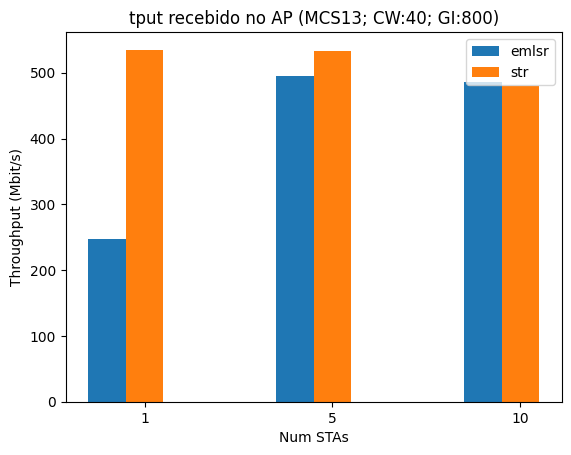

In [18]:
import matplotlib.pyplot as plt
import numpy as np

df_selected = df_selected.sort_values(by='numSTAs')

# print(df_selected)

filtered_by_cw_gi = df_selected.filter(items=['MCS', 'STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput'])\
                .where((df_selected.CW_GI == '40_800') & (df_selected.MCS == 13) & (df_selected.F1_F2_F3 == "2.4_6_0"))\
                .dropna(how='any')\
                .sort_values(by='numSTAs')

# print(filtered_by_cw_gi)

# Dados
categories = ['Categoria 1', 'Categoria 2', 'Categoria 3']
subcategories = ['Subcat A', 'Subcat B', 'Subcat C']
values = [[10, 15, 20], [20, 25, 30], [30, 35, 40]]

# DEFINE AS CATEGORIAS
categories = filtered_by_cw_gi['numSTAs'].unique()
print(categories)
categories = [categories[0], categories[1], categories[2],]

subcategories = all_data['STD'].unique()

print(f"categories: {categories}")
print(f"subcategories: {subcategories}")


# define os valores
values = []
for categorie in categories: 
    subvalues = []
    for subcategorie in subcategories:
        filtered_for_data = filtered_by_cw_gi.filter(items=['MCS','STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput'])\
                .where(
                    (filtered_by_cw_gi.STD == subcategorie) & (filtered_by_cw_gi.numSTAs == categorie)
                      )\
                .dropna(how='any')\
                .sort_values(by='numSTAs')
        print(filtered_for_data)
        print(filtered_for_data['Throughput'].unique())
        if len(filtered_for_data['Throughput'].unique()) == 0:
            data = 0
        else:
            data = filtered_for_data['Throughput'].unique()[0]
        subvalues.append(data)
    values.append(subvalues)
print(f"values: {values}")

# Número de categorias e subcategorias
n_categories = len(categories)
n_subcategories = len(subcategories)


# Largura das barras
bar_width = 0.2
index = np.arange(n_categories)

# Plotar as barras
for i in range(n_subcategories):
    plt.bar(index + i * bar_width, [values[j][i] for j in range(n_categories)], bar_width, label=subcategories[i])

# Título e rótulos
plt.title('tput recebido no AP (MCS13; CW:40; GI:800)')
plt.xlabel('Num STAs')
plt.ylabel('Throughput (Mbit/s)')

# Rótulos das categorias
plt.xticks(index + bar_width, categories)
plt.legend()

# Mostrar gráfico
plt.show()

In [20]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders


# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william'

# UBUNTU
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_6_24hz'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/testes_emlsr'
# folder_path = r'/home/william/ns-3/ns-allinone-3.43/ns-3.43/testes_emlsr'
# folder_path = r'/home/william/downloads/results_teste3'
folder_path = r'/home/william/downloads/singularity_job'

# home\william\downloads\results_teste

banda_filter = 40
gi_filter = 800

files, folders = list_file_n_foldes(folder_path)

# print(files)
# print(folders)

columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs', 'STD']
all_data = pd.DataFrame(columns=columns)
# print(all_data)

for folder in folders:
    sim_files, sub_folders = list_file_n_foldes(folder)
    # for file_t in sim_files:
    #     print(f"sim_file: {file_t}")
    for i, file_t in enumerate(sim_files):
        print(f"arquivo: {i}")
        # PEGA DADOS DO TITULO DO ARQUIVO
        path_names = file_t.split('/')
        file_name = path_names[-1]
        simulation_title_parts = file_name.split('_')

        # standard = simulation_title_parts[0]
        # numSTAs = int(simulation_title_parts[-1].split('.')[0])
        # frequency = int(simulation_title_parts[1].replace('GHz', ''))
        # frequency2 = 0
        # frequency3 = 0
        # if 'GHz' in simulation_title_parts[2]:
        #     frequency2 = int(simulation_title_parts[2].replace('GHz', ''))
        # if len(simulation_title_parts) > 3 and 'GHz' in simulation_title_parts[3]:
        #     frequency3 = int(simulation_title_parts[3].replace('GHz',

        # print('dados:', standard, numSTAs, frequency, frequency2, frequency3)

        standard = 'be'
        numSTAs = int(simulation_title_parts[-1].split('.')[0])
        frequency = int(simulation_title_parts[2].replace('GHz', ''))
        frequency2 = int(simulation_title_parts[3].replace('GHz', ''))
        frequency3 = int(simulation_title_parts[4].replace('GHz', ''))
        mlo_mode = simulation_title_parts[5]

        if (frequency == 2): frequency = 2.4
        if (frequency2 == 2): frequency2 = 2.4
        if (frequency3 == 2): frequency3 = 2.4

        print(f'NOME : {simulation_title_parts}')
        print('dados:', standard, mlo_mode, numSTAs, frequency, frequency2, frequency3)
        # continue

        file_path = str(file_t)[:(len(file_t) - 4)]
        print(f"file_path: {file_path}")

        mean_PLR = None
        mean_Delay = None
        mean_Jitter = None

        simulation_files, simulation_sub_folders = list_file_n_foldes(file_path)
        # print(f"simulation_files: {simulation_files}")
        for sim_flow_file in simulation_files:
            if "Zone.Identifier" in sim_flow_file:
                continue
            if "DL" not in sim_flow_file:
                continue
            # print(sim_flow_file)
            # Carregar um arquivo CSV com separador ',' (padrão)
            df = pd.read_csv(sim_flow_file)
            # Mostrar as primeiras linhas
            print(df.head())
            # print(df.columns)
            mean_PLR = df[" Packet_Loss_Ratio"].mean()
            mean_Delay = df[' Mean_Delay_Rx_Packets'].mean()
            mean_Jitter = df[' Mean_Jitter'].mean()

            mean_Tput_STA = df[' T_put(Mbps)'].mean()
            
            print(f" mean_PLR: {mean_PLR}\n mean_Delay: {mean_Delay}\n mean_Jitter: {mean_Jitter}\n mean_Tput_STA: {mean_Tput_STA}")

        file_path = file_t
        print(f"file_path: {file_path}")

        # Ler o arquivo de texto
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # print(f"lines: {len(lines)}")

        # Processar as linhas para extrair as informações
        data = []
        for line in lines[1:]:  # Pular o cabeçalho

            if 'Command' in line or 'MCS' in line or 'ninja' in line or 'Process' in line:
                continue

            # print(line)
            # RETIRA AS UNIDADES DOS DADOS
            line = line.replace('Mbit/s', '')
            line = line.replace('MHz', '')
            line = line.replace('ns', '')
            # print(line)

            # Dividir a linha por tabulações ou múltiplos espaços
            parts = line.split()
            print('parts:', parts)

            if not (parts[0]).isdigit():
                continue

            # # Adicionar os dados à lista
            mcs_value = int(parts[0])
            channel_width = int(parts[1])
            gi = int(parts[2])
            throughput = float(parts[3])

            # ADICIONA OS DADOS
            data.append(
                [mcs_value, channel_width, gi, throughput, frequency, frequency2, frequency3, numSTAs,
                 mlo_mode, mean_PLR, mean_Delay, mean_Jitter, mean_Tput_STA])

        # Criar um DataFrame a partir dos dados
        columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs',
                   'STD', 'PLR', 'Delay', 'Jitter', 'Tput_STA']
        df = pd.DataFrame(data, columns=columns)

        # print(df)
        all_data = pd.concat([all_data, df], ignore_index=True)

        # FILTRO
        # subset_complex = df[((df['Channel_width'] == banda_filter) & (df['GI'] == gi_filter))]

        # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
        # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
        tput = all_data['Throughput']
        # print(tput)

        # linha_data = {'Distance': dist, 'Throughput': tput.max()}

print("all_data")
print(all_data)

# FILTRA OS CW ABAIXO DE 40
all_data = all_data[(all_data['Channel_width'] <= 40)]

all_data["CW_GI"] = all_data["Channel_width"].astype(str) +"_"+  all_data["GI"].astype(str)
all_data["F1_F2_F3"] = all_data["Frequency"].astype(str) +"_"+all_data["Frequency2"].astype(str)+"_"+all_data["Frequency3"].astype(str)

df_selected = all_data[['STD', 'F1_F2_F3', 'MCS' ,'CW_GI', 'numSTAs', 'Throughput', 'PLR', 'Delay', 'Jitter', 'Tput_STA']] 
# df_selected.plot()

df_selected

arquivo: 0
NOME : ['Sim', '1153', '6', '5', '0', 'emlsr', '30.out']
dados: be emlsr 30 6 5 0
file_path: /home/william/downloads/singularity_job/singularity_job/Sim_1153_6_5_0_emlsr_30
file_path: /home/william/downloads/singularity_job/singularity_job/Sim_1153_6_5_0_emlsr_30.out
parts: ['NS_ASSERT', 'failed,', 'cond="GetMac()->CanForwardPacketsTo(rxAddr)",', 'msg="Cannot', 'forward', 'frame', 'to', '00:00:00:00:00:5b;', 'check', 'that', 'the', 'receiver', 'is', 'associated",', '+1.265078200s', '4', 'file=/home/wmcdnascimento/-allinone-3.43/-3.43/src/wifi/model/wifi-mac-queue-scheduler-impl.h,', 'line=358']
parts: ['NS_FATAL,', 'terminating']
parts: ['terminate', 'called', 'without', 'an', 'active', 'exception']
parts: ['srun:', 'error:', 'r1i2n12:', 'task', '0:', 'Exited', 'with', 'exit', 'code', '250']
arquivo: 1
NOME : ['Sim', '1101', '2', '0', '0', 'emlsr', '30.out']
dados: be emlsr 30 2.4 0 0
file_path: /home/william/downloads/singularity_job/singularity_job/Sim_1101_2_0_0_emlsr_30


,STD,F1_F2_F3,MCS,CW_GI,numSTAs,Throughput,PLR,Delay,Jitter,Tput_STA
0,emlsr,2.4_0_0,13,40_800,30,214.2200,0.283979,0.161207,0.001316,7.434989
1,emlsr,2.4_0_0,6,40_800,30,113.0340,0.211462,0.247131,0.002664,3.926710
2,str,2.4_6_0,0,40_800,20,28.9565,0.149386,0.122805,0.006894,1.513515
3,emlsr,2.4_6_5,6,40_800,1,125.5250,0.726243,0.456464,0.000062,130.546000
4,str,2.4_6_0,13,40_800,10,479.4800,0.296559,0.086907,0.000196,49.884930
...,...,...,...,...,...,...,...,...,...,...
117,str,2.4_6_0,6,40_800,40,210.5110,0.256149,0.177169,0.001883,5.479224
118,str,2.4_6_0,6,40_800,1,258.9680,0.147324,0.213159,0.000023,269.327000
119,emlsr,6.0_5_0,0,40_800,1,14.2470,0.498324,2.524320,0.000289,14.817300
120,emlsr,2.4_6_5,13,40_800,1,248.0210,0.758291,0.236323,0.000033,257.942000


In [21]:
# all_data
print(df_selected['F1_F2_F3'].unique())
df_selected.loc[df_selected['F1_F2_F3'] == "2.4_0_0", 'STD'] = "slo"


df_selected



['2.4_0_0' '2.4_6_0' '2.4_6_5' '6.0_5_0']


,STD,F1_F2_F3,MCS,CW_GI,numSTAs,Throughput,PLR,Delay,Jitter,Tput_STA
0,slo,2.4_0_0,13,40_800,30,214.2200,0.283979,0.161207,0.001316,7.434989
1,slo,2.4_0_0,6,40_800,30,113.0340,0.211462,0.247131,0.002664,3.926710
2,str,2.4_6_0,0,40_800,20,28.9565,0.149386,0.122805,0.006894,1.513515
3,emlsr,2.4_6_5,6,40_800,1,125.5250,0.726243,0.456464,0.000062,130.546000
4,str,2.4_6_0,13,40_800,10,479.4800,0.296559,0.086907,0.000196,49.884930
...,...,...,...,...,...,...,...,...,...,...
117,str,2.4_6_0,6,40_800,40,210.5110,0.256149,0.177169,0.001883,5.479224
118,str,2.4_6_0,6,40_800,1,258.9680,0.147324,0.213159,0.000023,269.327000
119,emlsr,6.0_5_0,0,40_800,1,14.2470,0.498324,2.524320,0.000289,14.817300
120,emlsr,2.4_6_5,13,40_800,1,248.0210,0.758291,0.236323,0.000033,257.942000


[1, 5, 10, 30]
categories: [1, 5, 10, 30]
subcategories: ['slo' 'emlsr' 'str']
    MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
120  13  emlsr  2.4_6_5  40_800       1     248.021  0.758291  0.236323   

       Jitter  Tput_STA  
120  0.000033   257.942  
[257.942]
    MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
121  13  slo  2.4_0_0  40_800       1     265.522  0.213969  0.212796   
61   13  slo  2.4_0_0  40_800       1     265.522  0.213969  0.212796   

       Jitter  Tput_STA  
121  0.000009   276.143  
61   0.000009   276.143  
[276.143]
   MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay   Jitter  \
23  13  str  2.4_6_5  40_800       1     804.201  0.216392  0.072856  0.00001   

    Tput_STA  
23    836.37  
[836.37]
   MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
58  13  emlsr  2.4_6_5  40_800       5     744.652  0.273963  0.057394   

      Jitter  Tput_STA  
58  0.000038   154.895  

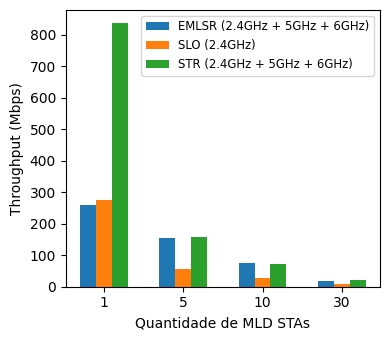

In [30]:
import matplotlib.pyplot as plt
import numpy as np

df_selected = df_selected.sort_values(by='numSTAs')

# print(df_selected)
linkfreqs = ["2.4_6_5", "2.4_0_0"]

filtered_by_cw_gi = df_selected.filter(items=['MCS', 'STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput', 'PLR', 'Delay', 'Jitter', 'Tput_STA'])\
                .where((df_selected.CW_GI == '40_800') & (df_selected.MCS == 13) & ((df_selected.F1_F2_F3 == "2.4_6_5") | (df_selected.F1_F2_F3 == "2.4_0_0")))\
                .dropna(how='any')\
                .sort_values(by='numSTAs')

# print(filtered_by_cw_gi)

# Dados
categories = ['Categoria 1', 'Categoria 2', 'Categoria 3']
subcategories = ['Subcat A', 'Subcat B', 'Subcat C']
values = [[10, 15, 20], [20, 25, 30], [30, 35, 40]]

# DEFINE AS CATEGORIAS
categories = filtered_by_cw_gi['numSTAs'].unique()
categories = [1, 5, 10, 30]
print(categories)
# categories = [categories[0], categories[1], categories[2],]

subcategories = df_selected['STD'].unique()
print(f"categories: {categories}")
print(f"subcategories: {subcategories}")
subcategories = sorted(subcategories)


# define os valores
values = []
for categorie in categories: 
    subvalues = []
    for subcategorie in subcategories:
        filtered_for_data = filtered_by_cw_gi.filter(items=['MCS','STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput', 'PLR', 'Delay', 'Jitter', 'Tput_STA'])\
                .where(
                    (filtered_by_cw_gi.STD == subcategorie) & (filtered_by_cw_gi.numSTAs == categorie)
                      )\
                .dropna(how='any')\
                .sort_values(by='numSTAs')
        param = "Tput_STA"
        print(filtered_for_data)
        print(filtered_for_data['Tput_STA'].unique())
        if len(filtered_for_data['Tput_STA'].unique()) == 0:
            data = 0
        else:
            data = filtered_for_data['Tput_STA'].unique()[0]
        subvalues.append(data)
    values.append(subvalues)
print(f"values: {values}")

# Número de categorias e subcategorias
n_categories = len(categories)
n_subcategories = len(subcategories)


# Largura das barras
bar_width = 0.2
index = np.arange(n_categories)

fig, ax = plt.subplots(figsize=(4, 3.5))

# Plotar as barras
subcategories = [((x.upper() + " (2.4GHz + 5GHz + 6GHz)" ) if (x != "slo") else (x.upper() + " (2.4GHz)" ) ) for x in subcategories ]

for i in range(n_subcategories):
    plt.bar(index + i * bar_width, [values[j][i] for j in range(n_categories)], bar_width, label=subcategories[i])

# Título e rótulos
# plt.title('(MCS13; CW:40; GI:800)')
# plt.xlabel('Num STAs')
plt.xlabel('Quantidade de MLD STAs')
# plt.ylabel(f'{param}')
plt.ylabel(f'Throughput (Mbps)')

# Rótulos das categorias
plt.xticks(index + bar_width, categories)
plt.legend(fontsize='small')

plt.tight_layout()
plt.savefig(f"{param}_perSTA.svg", format='svg')
# Mostrar gráfico
plt.show()

[1, 5, 10, 30]
categories: [1, 5, 10, 30]
subcategories: ['slo' 'str' 'emlsr']
    MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
120  13  emlsr  2.4_6_5  40_800       1     248.021  0.758291  0.236323   

       Jitter  
120  0.000033  
[0.236323]
    MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
121  13  slo  2.4_0_0  40_800       1     265.522  0.213969  0.212796   
61   13  slo  2.4_0_0  40_800       1     265.522  0.213969  0.212796   

       Jitter  
121  0.000009  
61   0.000009  
[0.212796]
   MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay   Jitter
23  13  str  2.4_6_5  40_800       1     804.201  0.216392  0.072856  0.00001
[0.0728556]
   MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
58  13  emlsr  2.4_6_5  40_800       5     744.652  0.273963  0.057394   

      Jitter  
58  0.000038  
[0.05739438]
    MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
114  13  slo  2

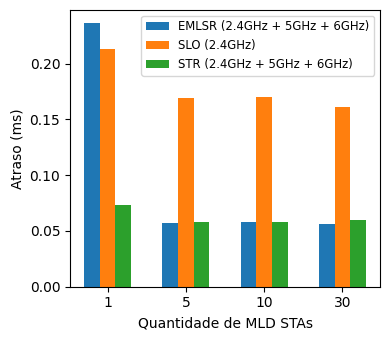

In [31]:
import matplotlib.pyplot as plt
import numpy as np

df_selected = df_selected.sort_values(by='numSTAs')

# print(df_selected)

filtered_by_cw_gi = df_selected.filter(items=['MCS', 'STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput', 'PLR', 'Delay', 'Jitter'])\
                .where((df_selected.CW_GI == '40_800') & (df_selected.MCS == 13) & ((df_selected.F1_F2_F3 == "2.4_6_5") | (df_selected.F1_F2_F3 == "2.4_0_0")))\
                .dropna(how='any')\
                .sort_values(by='numSTAs')

# print(filtered_by_cw_gi)

# Dados
categories = ['Categoria 1', 'Categoria 2', 'Categoria 3']
subcategories = ['Subcat A', 'Subcat B', 'Subcat C']
values = [[10, 15, 20], [20, 25, 30], [30, 35, 40]]

# DEFINE AS CATEGORIAS
categories = filtered_by_cw_gi['numSTAs'].unique()
categories = [1, 5, 10, 30]
print(categories)
# categories = [categories[0], categories[1], categories[2],]

subcategories = df_selected['STD'].unique()

print(f"categories: {categories}")
print(f"subcategories: {subcategories}")
subcategories = sorted(subcategories)


# define os valores
values = []
for categorie in categories: 
    subvalues = []
    for subcategorie in subcategories:
        filtered_for_data = filtered_by_cw_gi.filter(items=['MCS','STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput', 'PLR', 'Delay', 'Jitter'])\
                .where(
                    (filtered_by_cw_gi.STD == subcategorie) & (filtered_by_cw_gi.numSTAs == categorie)
                      )\
                .dropna(how='any')\
                .sort_values(by='numSTAs')
        param = "Delay"
        print(filtered_for_data)
        print(filtered_for_data['Delay'].unique())
        if len(filtered_for_data['Delay'].unique()) == 0:
            data = 0
        else:
            data = filtered_for_data['Delay'].unique()[0]
        subvalues.append(data)
    values.append(subvalues)
print(f"values: {values}")

# Número de categorias e subcategorias
n_categories = len(categories)
n_subcategories = len(subcategories)


# Largura das barras
bar_width = 0.2
index = np.arange(n_categories)

fig, ax = plt.subplots(figsize=(4, 3.5))

# Plotar as barras
subcategories = [((x.upper() + " (2.4GHz + 5GHz + 6GHz)" ) if (x != "slo") else (x.upper() + " (2.4GHz)" ) ) for x in subcategories ]

for i in range(n_subcategories):
    plt.bar(index + i * bar_width, [values[j][i] for j in range(n_categories)], bar_width, label=subcategories[i])

# Título e rótulos
# plt.title(' (MCS13; CW:40; GI:800)')
plt.xlabel('Num STAs')
plt.xlabel('Quantidade de MLD STAs')
# plt.ylabel(f'{param} (ms)')
plt.ylabel(f'Atraso (ms)')

# Rótulos das categorias
plt.xticks(index + bar_width, categories)
# plt.legend()
plt.legend(fontsize='small')

plt.tight_layout()
plt.savefig(f"{param}_perSTA.svg", format='svg')
# Mostrar gráfico
plt.show()

[1, 5, 10, 30]
categories: [1, 5, 10, 30]
subcategories: ['slo' 'emlsr' 'str']
    MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
120  13  emlsr  2.4_6_5  40_800       1     248.021  0.758291  0.236323   

       Jitter  
120  0.000033  
[0.758291]
    MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
121  13  slo  2.4_0_0  40_800       1     265.522  0.213969  0.212796   
61   13  slo  2.4_0_0  40_800       1     265.522  0.213969  0.212796   

       Jitter  
121  0.000009  
61   0.000009  
[0.213969]
   MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay   Jitter
23  13  str  2.4_6_5  40_800       1     804.201  0.216392  0.072856  0.00001
[0.216392]
   MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
58  13  emlsr  2.4_6_5  40_800       5     744.652  0.273963  0.057394   

      Jitter  
58  0.000038  
[0.2739634]
    MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput       PLR     Delay  \
114  13  slo  2.4

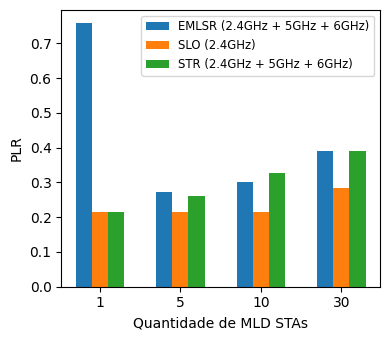

In [33]:
import matplotlib.pyplot as plt
import numpy as np

df_selected = df_selected.sort_values(by='numSTAs')

# print(df_selected)

filtered_by_cw_gi = df_selected.filter(items=['MCS', 'STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput', 'PLR', 'Delay', 'Jitter'])\
                .where((df_selected.CW_GI == '40_800') & (df_selected.MCS == 13) & ((df_selected.F1_F2_F3 == "2.4_6_5") | (df_selected.F1_F2_F3 == "2.4_0_0")))\
                .dropna(how='any')\
                .sort_values(by='numSTAs')

# print(filtered_by_cw_gi)

# Dados
categories = ['Categoria 1', 'Categoria 2', 'Categoria 3']
subcategories = ['Subcat A', 'Subcat B', 'Subcat C']
values = [[10, 15, 20], [20, 25, 30], [30, 35, 40]]

# DEFINE AS CATEGORIAS
categories = filtered_by_cw_gi['numSTAs'].unique()
categories = [1, 5, 10, 30]
print(categories)
# categories = [categories[0], categories[1], categories[2],]

# subcategories = all_data['STD'].unique()
subcategories = df_selected['STD'].unique()

print(f"categories: {categories}")
print(f"subcategories: {subcategories}")
subcategories = sorted(subcategories)

# define os valores
values = []
for categorie in categories: 
    subvalues = []
    for subcategorie in subcategories:
        filtered_for_data = filtered_by_cw_gi.filter(items=['MCS','STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput', 'PLR', 'Delay', 'Jitter'])\
                .where(
                    (filtered_by_cw_gi.STD == subcategorie) & (filtered_by_cw_gi.numSTAs == categorie)
                      )\
                .dropna(how='any')\
                .sort_values(by='numSTAs')
        param = "PLR"
        print(filtered_for_data)
        print(filtered_for_data[param].unique())
        if len(filtered_for_data[param].unique()) == 0:
            data = 0
        else:
            data = filtered_for_data[param].unique()[0]
        subvalues.append(data)
    values.append(subvalues)
print(f"values: {values}")

# Número de categorias e subcategorias
n_categories = len(categories)
n_subcategories = len(subcategories)


# Largura das barras
bar_width = 0.2
index = np.arange(n_categories)

fig, ax = plt.subplots(figsize=(4, 3.5))

# Plotar as barras
subcategories = [((x.upper() + " (2.4GHz + 5GHz + 6GHz)" ) if (x != "slo") else (x.upper() + " (2.4GHz)" ) ) for x in subcategories ]
for i in range(n_subcategories):
    plt.bar(index + i * bar_width, [values[j][i] for j in range(n_categories)], bar_width, label=subcategories[i])

# Título e rótulos
# plt.title('tput recebido no AP (MCS13; CW:40; GI:800)')
# plt.xlabel('Num STAs')
plt.xlabel('Quantidade de MLD STAs')
# plt.ylabel(f'{param} (Packet Loss Ratio) ')
plt.ylabel(f'PLR')

# Rótulos das categorias
plt.xticks(index + bar_width, categories)
# plt.legend()
plt.legend(fontsize='small')

# Mostrar gráfico
plt.tight_layout()
plt.savefig(f"{param}_perSTA.svg", format='svg')
plt.show()